Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

2021/09/30

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

### Read the Portal of Experimental Ocean Acidification Data
https://dataportals.pangaea.de/oa-icc/index2.php?

#### DATA SEARCH

https://wiki.pangaea.de/wiki/Main_Page

The harvested data centers are available through a large, all-containing, public, read-only Elasticsearch node; available at: http://ws.pangaea.de/es/portals/pansimple/_search?pretty

In [1]:
import json
import urllib
import pandas as pd

In [2]:
# Extract all articles (citation_date and keyword included)

url = 'http://ws.pangaea.de/es/dataportal-oa-icc/pansimple/_search?size=2000&_source_include=citation_date,keyword'

jsonurl = urllib.request.urlopen(url)
jsonread = json.loads(jsonurl.read())
jsonurl.close()

In [3]:
# Transform the resulting json to a pandas dataframe

df = pd.DataFrame.from_dict(jsonread['hits']['hits'])
df

,_index,_type,_id,_score,_source
0,portals_v2,pansimple,PANGAEA.884674,1.0,"{'citation_date': '2018-01-09', 'keyword': ['A..."
1,portals_v2,pansimple,PANGAEA.771570,1.0,"{'citation_date': '2011-11-18', 'keyword': ['A..."
2,portals_v2,pansimple,PANGAEA.779703,1.0,"{'citation_date': '2011-04-21', 'keyword': ['B..."
3,portals_v2,pansimple,PANGAEA.891075,1.0,"{'citation_date': '2018-06-15', 'keyword': ['A..."
4,portals_v2,pansimple,PANGAEA.885874,1.0,"{'citation_date': '2018-02-02', 'keyword': ['B..."
...,...,...,...,...,...
1319,portals_v2,pansimple,PANGAEA.718841,1.0,"{'citation_date': '2008-06-12', 'keyword': ['B..."
1320,portals_v2,pansimple,PANGAEA.925983,1.0,"{'citation_date': '2020-12-21', 'keyword': ['A..."
1321,portals_v2,pansimple,PANGAEA.770439,1.0,"{'citation_date': '2011-10-12', 'keyword': ['B..."
1322,portals_v2,pansimple,PANGAEA.836013,1.0,"{'citation_date': '2013-09-17', 'keyword': ['A..."


In [4]:
# Reorganize _source dictionnary as columns

# Sometimes only {} and not {'keyword: [...]'}
df['citation_date'] = df['_source'].apply(
    lambda x: eval(str(x))['citation_date'] if 'citation_date' in eval(str(x)).keys() else None)
df['keyword'] = df['_source'].apply(
    lambda x: eval(str(x))['keyword'] if 'keyword' in eval(str(x)).keys() else None)

In [5]:
# Drop unused columns

df.drop(['_score','_type','_index','_source'], axis=1, inplace=True)
df.sort_values(by=['citation_date'])

,_id,citation_date,keyword
422,PANGAEA.755149,1967-12-13,"[Calcification/Dissolution, Coast and continen..."
393,PANGAEA.717620,1992-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
138,PANGAEA.717621,1994-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
1115,PANGAEA.721926,1995-03-01,"[Benthos, Calcification/Dissolution, Coast and..."
34,PANGAEA.716842,1995-05-30,"[Benthos, Calcification/Dissolution, Coast and..."
...,...,...,...
921,PANGAEA.934044,2021-07-26,"[Behaviour, Benthos, Calcification/Dissolution..."
1302,PANGAEA.934135,2021-07-28,"[Baltic Sea, Biomass/Abundance/Elemental compo..."
874,PANGAEA.934128,2021-07-28,"[Benthos, Biomass/Abundance/Elemental composit..."
582,PANGAEA.935477,2021-09-06,"[Benthos, Calcification/Dissolution, Clathromo..."


In [6]:
# Extract all keywords

allKeywordsDB = sorted(df['keyword'].apply(pd.Series).stack().unique())
print(len(allKeywordsDB))
allKeywordsDB

1130


['Abatus cavernosus',
 'Abra alba',
 'Abra nitida',
 'Abra prismatica',
 'Abra tenuis',
 'Acanthaster planci',
 'Acanthochromis polyacanthus',
 'Acanthopagrus schlegelii',
 'Acanthophora spicifera',
 'Acartia bifilosa',
 'Acartia clausi',
 'Acartia grani',
 'Acartia hudsonica',
 'Acartia sp.',
 'Acartia tonsa',
 'Acetabularia acetabulum',
 'Acid-base regulation',
 'Acinetospora crinita',
 'Acipenser baerii',
 'Acropora cerealis',
 'Acropora cervicornis',
 'Acropora digitifera',
 'Acropora eurystoma',
 'Acropora formosa',
 'Acropora horrida',
 'Acropora hyacinthus',
 'Acropora intermedia',
 'Acropora millepora',
 'Acropora muricata',
 'Acropora palmata',
 'Acropora pulchra',
 'Acropora sp.',
 'Acropora spicifera',
 'Acropora tenuis',
 'Acropora verweyi',
 'Acropora yongei',
 'Acrosorium ciliolatum',
 'Acteon tornatilis',
 'Adamussium colbecki',
 'Adelosina longirostra',
 'Affinetrina gualtieriana',
 'Agardhiella subulata',
 'Agaricia agaricites',
 'Aglaothamnion byssoides',
 'Aiptasia p

In [7]:
# Example of a selection on a date range

s = df[df['citation_date'].between('2016-01-01', '2016-02-31')]
print(len(s))
s.sort_values(by=['citation_date'])

12


,_id,citation_date,keyword
151,PANGAEA.870407,2016-01-04,"[Animalia, Antarctic, Arthropoda, Behaviour, B..."
865,PANGAEA.870468,2016-01-09,"[Animalia, Arctic, Behaviour, Boreogadus saida..."
631,PANGAEA.870707,2016-01-12,"[Benthos, Biomass/Abundance/Elemental composit..."
1062,PANGAEA.870757,2016-01-13,"[Animalia, Benthic animals, Benthos, Brackish ..."
174,PANGAEA.870756,2016-01-29,"[Arctic, Benthos, Bottles or small containers/..."
135,PANGAEA.871938,2016-02-10,"[Acid-base regulation, Animalia, Arthropoda, B..."
7,PANGAEA.872024,2016-02-14,"[Animalia, Bottles or small containers/Aquaria..."
87,PANGAEA.872313,2016-02-17,"[Animalia, Benthic animals, Benthos, Brackish ..."
358,PANGAEA.872397,2016-02-20,"[Animalia, Atherina presbyter, Behaviour, Chor..."
654,PANGAEA.872533,2016-02-22,"[Baltic Sea, Benthos, Biomass/Abundance/Elemen..."


In [9]:
# Read the CSV file that defines category/keyword relation

df1 = pd.read_csv('OA-ICC_keywords_current.csv')
df1

,Category,Keywords
0,Geographical location,Antarctic
1,Geographical location,Arctic
2,Geographical location,Baltic Sea
3,Geographical location,Black Sea
4,Geographical location,Indian Ocean
...,...,...
1138,Type of community,Rocky-shore community
1139,Type of community,Soft-bottom community
1140,Type of study,Field experiment
1141,Type of study,Field observation


In [10]:
# Aggregate keywords by category

dfCategory = df1.groupby('Category').aggregate(lambda x: sorted(set(x)))
dfCategory

,Keywords
Category,
Geographical location,"[Antarctic, Arctic, Baltic Sea, Black Sea, Ind..."
Incubation type,"[Bottles or small containers/Aquaria (<20 L), ..."
Latitudinal location,"[Polar, Temperate, Tropical]"
Living compartment,"[Benthos, Pelagos]"
Marine habitat,"[Brackish waters, Coast and continental shelf,..."
Multiple stressors,"[Inorganic toxins, Light, Macro-nutrients, Mic..."
OA Natural analog,"[CO2 vent, Estuary, Upwelling]"
Studied parameter or process,"[Acid-base regulation, Behaviour, Biomass/Abun..."
Study focus,"[Entire community, Single species, Species int..."


In [11]:
# Define a python dictionnary for each category

dictCategory = dfCategory.to_dict(orient='dict')['Keywords']
dictCategory

{'Geographical location': ['Antarctic',
  'Arctic',
  'Baltic Sea',
  'Black Sea',
  'Indian Ocean',
  'Mediterranean Sea',
  'North Atlantic',
  'North Pacific',
  'Not applicable',
  'Red Sea',
  'South Atlantic',
  'South Pacific'],
 'Incubation type': ['Bottles or small containers/Aquaria (<20 L)',
  'Containers and aquaria (20-1000 L or < 1 m**2)',
  'Mesocosm or benthocosm'],
 'Latitudinal location': ['Polar', 'Temperate', 'Tropical'],
 'Living compartment': ['Benthos', 'Pelagos'],
 'Marine habitat': ['Brackish waters',
  'Coast and continental shelf',
  'Deep-sea',
  'Laboratory strains',
  'Open ocean'],
 'Multiple stressors': ['Inorganic toxins',
  'Light',
  'Macro-nutrients',
  'Micro-nutrients',
  'Organic toxins',
  'Other',
  'Oxygen',
  'Salinity',
  'Temperature'],
 'OA Natural analog': ['CO2 vent', 'Estuary', 'Upwelling'],
 'Studied parameter or process': ['Acid-base regulation',
  'Behaviour',
  'Biomass/Abundance/Elemental composition',
  'Calcification/Dissolution',

In [12]:
# Extract all keywords from the OA-ICC_keywords_current.csv

allKeywords = dfCategory['Keywords'].apply(pd.Series).stack().unique()
print(len(allKeywords))
allKeywords

1143


array(['Antarctic', 'Arctic', 'Baltic Sea', ..., 'Field experiment',
       'Field observation', 'Laboratory experiment'], dtype=object)

In [13]:
# Numbers of effective keywords used from the different category keywords

for category in sorted(dictCategory.keys()):
    searchedKeywords = dfCategory[dfCategory.index == category]['Keywords'][0]
    df[category] = df['keyword'].apply(lambda x: list(set(x) & set(searchedKeywords)) if x != None else [])
    z = df[category].apply(pd.Series).stack()
    print("=================================================================")
    print("%04d/%04d %s" % (len(z.unique()), len(searchedKeywords), category))
    print(z.unique())
    diff = set(searchedKeywords) - set(z)
    if len(diff) != 0:
        print('\n-----> Never used:', list(diff)[0:10])
    print()

0011/0012 Geographical location
['North Atlantic' 'Indian Ocean' 'North Pacific' 'South Pacific'
 'Mediterranean Sea' 'Not applicable' 'Baltic Sea' 'Arctic' 'Antarctic'
 'Red Sea' 'South Atlantic']

-----> Never used: ['Black Sea']

0003/0003 Incubation type
['Bottles or small containers/Aquaria (<20 L)' 'Mesocosm or benthocosm'
 'Containers and aquaria (20-1000 L or < 1 m**2)']

0003/0003 Latitudinal location
['Temperate' 'Tropical' 'Polar']

0002/0002 Living compartment
['Pelagos' 'Benthos']

0005/0005 Marine habitat
['Coast and continental shelf' 'Laboratory strains' 'Brackish waters'
 'Open ocean' 'Deep-sea']

0009/0009 Multiple stressors
['Macro-nutrients' 'Temperature' 'Other' 'Oxygen' 'Light' 'Organic toxins'
 'Salinity' 'Micro-nutrients' 'Inorganic toxins']

0003/0003 OA Natural analog
['CO2 vent' 'Estuary' 'Upwelling']

0015/0015 Studied parameter or process
['Behaviour' 'Other studied parameter or process'
 'Calcification/Dissolution' 'Growth/Morphology'
 'Primary production/

In [14]:
# Example of keywords category 

print(dictCategory['Geographical location'])

['Antarctic', 'Arctic', 'Baltic Sea', 'Black Sea', 'Indian Ocean', 'Mediterranean Sea', 'North Atlantic', 'North Pacific', 'Not applicable', 'Red Sea', 'South Atlantic', 'South Pacific']


In [15]:
# Find different keywords or all keywords, combined with date ranges (before 2015 and after)

#selection = ['North Pacific', 'South Pacific']
#selection = ['Mediterranean Sea']
selection = dictCategory['Geographical location']    # all keywords

s_total = df[df['Geographical location'].apply(lambda x: bool(set(x) & set(selection)))]
s_period1 = s_total[s_total['citation_date'].between('1950-01-01', '2015-12-31')]
s_period2 = s_total[s_total['citation_date'].between('2016-01-01', '2030-12-31')]

print('Total: ', len(s_total))
print('<= 2015', len(s_period1))
print('>  2015', len(s_period2))

s_period2.sort_values(by=['citation_date'])

Total:  1203
<= 2015 627
>  2015 576


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
151,PANGAEA.870407,2016-01-04,"[Animalia, Antarctic, Arthropoda, Behaviour, B...",[Antarctic],[Bottles or small containers/Aquaria (<20 L)],[Polar],[Benthos],[Coast and continental shelf],[Temperature],[],"[Growth/Morphology, Behaviour, Mortality/Survi...",[Single species],[Benthic animals],[Animalia],[Arthropoda],"[Paradexamine fissicauda, Gondogeneia antarctica]",[],[Laboratory experiment]
865,PANGAEA.870468,2016-01-09,"[Animalia, Arctic, Behaviour, Boreogadus saida...","[Arctic, North Atlantic]",[Containers and aquaria (20-1000 L or < 1 m**2)],[Polar],[Pelagos],[Coast and continental shelf],[Temperature],[],"[Growth/Morphology, Behaviour, Mortality/Survi...",[Single species],[Nekton],[Animalia],[Chordata],"[Boreogadus saida, Gadus morhua]",[],[Laboratory experiment]
631,PANGAEA.870707,2016-01-12,"[Benthos, Biomass/Abundance/Elemental composit...",[North Pacific],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[Benthos],[Coast and continental shelf],[Temperature],[],"[Biomass/Abundance/Elemental composition, Prim...",[Entire community],[],[],[],[],[Soft-bottom community],[Laboratory experiment]
1062,PANGAEA.870757,2016-01-13,"[Animalia, Benthic animals, Benthos, Brackish ...",[South Pacific],[],[Temperate],[Benthos],[Brackish waters],[],[Estuary],"[Calcification/Dissolution, Growth/Morphology,...",[Single species],[Benthic animals],[Animalia],[Mollusca],[Perumytilus purpuratus],[],[Field experiment]
174,PANGAEA.870756,2016-01-29,"[Arctic, Benthos, Bottles or small containers/...",[Arctic],[Bottles or small containers/Aquaria (<20 L)],[Polar],[Benthos],[Coast and continental shelf],[Temperature],[],"[Growth/Morphology, Primary production/Photosy...",[Single species],[Macroalgae],[Chromista],[Ochrophyta],"[Laminaria solidungula, Saccharina latissima]",[],[Laboratory experiment]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,PANGAEA.934044,2021-07-26,"[Behaviour, Benthos, Calcification/Dissolution...",[North Pacific],[Mesocosm or benthocosm],[Temperate],[Benthos],[Coast and continental shelf],[Other],[],"[Community composition and diversity, Calcific...",[Entire community],[],[],[],[],[Rocky-shore community],[Laboratory experiment]
874,PANGAEA.934128,2021-07-28,"[Benthos, Biomass/Abundance/Elemental composit...",[South Pacific],[],[Temperate],[Benthos],[Coast and continental shelf],[],[CO2 vent],"[Community composition and diversity, Growth/M...",[Entire community],[],[],[],[],[Rocky-shore community],[Field observation]
1302,PANGAEA.934135,2021-07-28,"[Baltic Sea, Biomass/Abundance/Elemental compo...",[Baltic Sea],[Mesocosm or benthocosm],[Temperate],[Pelagos],[Coast and continental shelf],[Temperature],[],[Biomass/Abundance/Elemental composition],[Entire community],[],[],[],[],[],[Laboratory experiment]
582,PANGAEA.935477,2021-09-06,"[Benthos, Calcification/Dissolution, Clathromo...","[North Atlantic, North Pacific]",[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Benthos],[Coast and continental shelf],[Temperature],[],[Calcification/Dissolution],[Single species],[Macroalgae],[Plantae],[Rhodophyta],"[Clathromorphum compactum, Clathromorphum nere...",[],[Laboratory experiment]


In [16]:
# Example of an inversing boolean mask (here all articles that does not have a living compartment keyword)

selection = ['Pelagos','Benthos']
s = df[~df['Living compartment'].apply(lambda x: bool(set(x) & set(selection)))]
print(len(s))
s.sort_values(by=['citation_date'])

29


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
663,PANGAEA.779699,2003-04-21,"[Not applicable, Respiration, Stylophora pisti...",[Not applicable],[],[],[],[],[Temperature],[],[Respiration],[],[],[],[],[Stylophora pistillata],[],[]
1036,PANGAEA.756649,2010-01-28,Diploria labyrinthiformis,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
675,PANGAEA.735138,2010-03-16,Not applicable,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
178,PANGAEA.756663,2010-08-19,"[Animalia, Benthic animals, Bottles or small c...",[North Atlantic],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[],[Coast and continental shelf],[],[],"[Growth/Morphology, Other metabolic rates, Res...",[Single species],[Benthic animals],[Animalia],[Mollusca],[Mytilus edulis],[],[Laboratory experiment]
264,PANGAEA.774587,2011-01-23,Strongylocentrotus purpuratus,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
204,PANGAEA.777724,2011-03-15,"[Balanophyllia europaea, Cladocora caespitosa,...",[],[],[Temperate],[],[Coast and continental shelf],[Temperature],[CO2 vent],[],[],[],[],[],"[Patella caerulea, Balanophyllia europaea, Cla...",[],[Field experiment]
1015,PANGAEA.767576,2011-08-31,"[Antarctic, Emiliania huxleyi, Indian Ocean, N...","[North Atlantic, Antarctic, South Atlantic, So...",[],[],[],[],[],[],[],[],[Phytoplankton],[],[],[Emiliania huxleyi],[],[]
630,PANGAEA.770101,2011-09-23,Emiliania huxleyi,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
260,PANGAEA.770096,2011-09-23,Emiliania huxleyi,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
229,PANGAEA.826461,2012-01-21,"[Laboratory experiment, Laboratory strains, Li...",[North Pacific],[],[],[],[Laboratory strains],[Light],[],[Respiration],[],[Phytoplankton],[],[Ochrophyta],[Thalassiosira pseudonana],[],[Laboratory experiment]


In [18]:
dhisto = pd.DataFrame()

year = 2015
list1 = ['Targeted phylum', 'Study focus', 'Studied parameter or process', 'Multiple stressors']

for l in list1:
    selection = dictCategory[l]
    s_total = df[df[l].apply(lambda x: bool(set(x) & set(selection)))]
    s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
    s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
    dhisto = dhisto.append({'name': l, 
                            'before ' + str(year): 100 * len(s_period1)/len(s_total), 
                            'after ' + str(year):  100 * len(s_period2)/len(s_total)}, 
                           ignore_index=True)

dhisto.set_index('name', inplace=True)
dhisto

,before 2015,after 2015
name,,
Targeted phylum,46.031746,53.968254
Study focus,45.510361,54.489639
Studied parameter or process,45.496894,54.503106
Multiple stressors,37.675351,62.324649


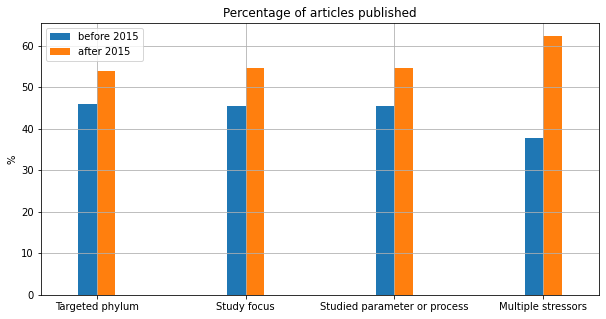

In [19]:
p = dhisto.plot.bar(title="Percentage of articles published", 
                xlabel="", ylabel="%",
                rot=0, grid=True, figsize=[10,5], width=0.25)